## Importing the libraries

In [84]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import category_encoders as ce

In [86]:
df = pd.read_csv('/content/homebazzar_updated.csv')

In [87]:
df.head()

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName,propetyBuyOrRent,localityId,sublocalityId,cityId,possessionYear,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,Under Construction,Hiranandani Group,buy,474,882,1,2022.0,10.0,appartment,10,5.0,2.5,1,1,1.23 Cr
1,0,304,1707,Ready Possession,Hiranandani Group,buy,35,1457,1,NaN,9.0,appartment,10,5.0,2.5,1,1,47.5 L
2,0,701,1092,Ready Possession,Hiranandani Group,buy,474,882,1,NaN,10.0,appartment,9,5.0,2.5,1,1,1.66 Cr
3,0,1251,1300,Ready Possession,Hiranandani Group,buy,474,882,1,2018.0,9.0,appartment,9,5.0,3.0,1,1,0
4,0,316,413,Under Construction,Hiranandani Group,buy,474,884,1,2024.0,NaN,commercial_office,9,5.0,0.0,0,0,94 L


In [88]:
df.describe()

,furnishing_status,minCarpetArea,maxCarpetArea,localityId,sublocalityId,cityId,possessionYear,liveabilityIndexCount,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen
count,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1599.000000,1659.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000
mean,0.077999,993.715438,1522.172673,342.619688,1464.769231,1.684777,2021.689181,5.620253,5.624529,4.095481,2.001883,0.892953,0.892953
std,0.268242,2689.331675,2973.995647,300.391161,859.910827,2.135768,3.857321,2.357745,2.340719,0.818352,1.034976,0.309256,0.309256
min,0.000000,0.000000,0.000000,5.000000,6.000000,1.000000,1997.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,410.000000,636.500000,60.000000,858.000000,1.000000,2019.000000,4.000000,4.000000,3.500000,1.500000,1.000000,1.000000
50%,0.000000,616.000000,979.000000,279.000000,1472.000000,1.000000,2023.000000,4.000000,4.000000,4.000000,2.000000,1.000000,1.000000
75%,0.000000,922.500000,1550.500000,474.000000,1987.000000,2.000000,2024.000000,8.000000,8.000000,5.000000,2.500000,1.000000,1.000000
max,1.000000,50150.000000,50150.000000,1277.000000,3552.000000,24.000000,2036.000000,10.000000,10.000000,5.000000,5.500000,1.000000,1.000000


## Preprossing 

#### Prices

In [89]:
df['prices'].head()

0    1.23 Cr
1     47.5 L
2    1.66 Cr
3          0
4       94 L
Name: prices, dtype: object

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   furnishing_status       1859 non-null   int64  
 1   minCarpetArea           1859 non-null   int64  
 2   maxCarpetArea           1859 non-null   int64  
 3   possessionStatus        1859 non-null   object 
 4   developerName           1859 non-null   object 
 5   propetyBuyOrRent        1859 non-null   object 
 6   localityId              1859 non-null   int64  
 7   sublocalityId           1859 non-null   int64  
 8   cityId                  1859 non-null   int64  
 9   possessionYear          1599 non-null   float64
 10  liveabilityIndexCount   1659 non-null   float64
 11  propertyType            1859 non-null   object 
 12  bestForInvestmentCount  1859 non-null   int64  
 13  builder_rating          1859 non-null   float64
 14  Bedroom                 1859 non-null   

In [91]:
def multiplty(text):  
  if "Cr" in text:
    text = text.replace('Cr', '')
    text = float(text)
    text = int(text*10000000)
    return text
  elif "L" in text:
    text = text.replace('L', '')
    text = float(text)
    text= int(100000*text)
    return text
  else:
    itext= int(text)
    return text

In [92]:
df['prices'] = df['prices'].apply(multiplty)

In [93]:
df['prices'] = df['prices'].astype(int)

In [94]:
df = df[df.prices != 0]

In [95]:
df.describe()

,furnishing_status,minCarpetArea,maxCarpetArea,localityId,sublocalityId,cityId,possessionYear,liveabilityIndexCount,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
count,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1444.000000,1579.000000,1684.000000,1684.000000,1684.000000,1684.000000,1684.000000,1.684000e+03
mean,0.055819,807.428147,1308.017815,345.284442,1471.536817,1.574822,2022.004848,5.576314,5.584917,4.092043,2.077791,0.937055,0.937055,2.272915e+07
std,0.229641,760.884397,1267.244325,302.423865,864.402517,1.877973,3.589946,2.326564,2.312340,0.810190,0.941645,0.242937,0.242937,3.639526e+07
min,0.000000,0.000000,0.000000,5.000000,6.000000,1.000000,2005.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000e+06
25%,0.000000,418.000000,642.000000,60.000000,861.000000,1.000000,2020.000000,4.000000,4.000000,3.500000,1.500000,1.000000,1.000000,6.876749e+06
50%,0.000000,615.500000,973.000000,279.000000,1506.000000,1.000000,2023.000000,4.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.210000e+07
75%,0.000000,880.000000,1501.250000,474.000000,2005.250000,2.000000,2025.000000,8.000000,8.000000,5.000000,2.500000,1.000000,1.000000,2.300000e+07
max,1.000000,8383.000000,17100.000000,1277.000000,3552.000000,24.000000,2036.000000,10.000000,10.000000,5.000000,5.000000,1.000000,1.000000,3.825000e+08


#### DeveloperName

In [96]:
df['developerName'].unique().shape

(249,)

In [97]:
df['developerName'].value_counts().head(10)

Lodha Group                  105
Godrej Properties             83
Prestige Group                68
Hiranandani Group             56
Kolte Patil Developers        48
Kalpataru Group               42
Runwal Group                  37
Wadhwa Group                  33
Puravankara Builders          32
Paranjape Schemes Limited     28
Name: developerName, dtype: int64

##### Binary Encoding 

In [98]:
encoder = ce.BinaryEncoder(cols=['developerName'])
df = encoder.fit_transform(df)
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,...,cityId,possessionYear,liveabilityIndexCount,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,Kitchen,prices
0,0,471,2342,Under Construction,0,0,0,0,0,0,...,1,2022.0,10.0,appartment,10,5.0,2.5,1,1,12300000
1,0,304,1707,Ready Possession,0,0,0,0,0,0,...,1,NaN,9.0,appartment,10,5.0,2.5,1,1,4750000
2,0,701,1092,Ready Possession,0,0,0,0,0,0,...,1,NaN,10.0,appartment,9,5.0,2.5,1,1,16600000
4,0,316,413,Under Construction,0,0,0,0,0,0,...,1,2024.0,NaN,commercial_office,9,5.0,0.0,0,0,9400000
6,0,566,784,Under Construction,0,0,0,0,0,0,...,1,2026.0,9.0,appartment,10,5.0,2.5,1,1,21000000
7,0,2200,3668,Ready Possession,0,0,0,0,0,0,...,1,NaN,10.0,appartment,9,5.0,4.5,1,1,58600000
8,0,253,253,Ready Possession,0,0,0,0,0,0,...,1,NaN,NaN,commercial_office,9,5.0,0.0,0,0,11299999
9,0,316,316,Ready Possession,0,0,0,0,0,0,...,1,2019.0,NaN,commercial_office,9,5.0,0.0,0,0,9711000
10,0,316,323,Under Construction,0,0,0,0,0,0,...,1,2024.0,NaN,commercial_office,9,5.0,0.0,0,0,11600000
11,0,263,1764,Under Construction,0,0,0,0,0,0,...,1,2023.0,8.0,appartment,10,5.0,2.5,1,1,5630000


#### liveability index count & kitchen 

<AxesSubplot:>

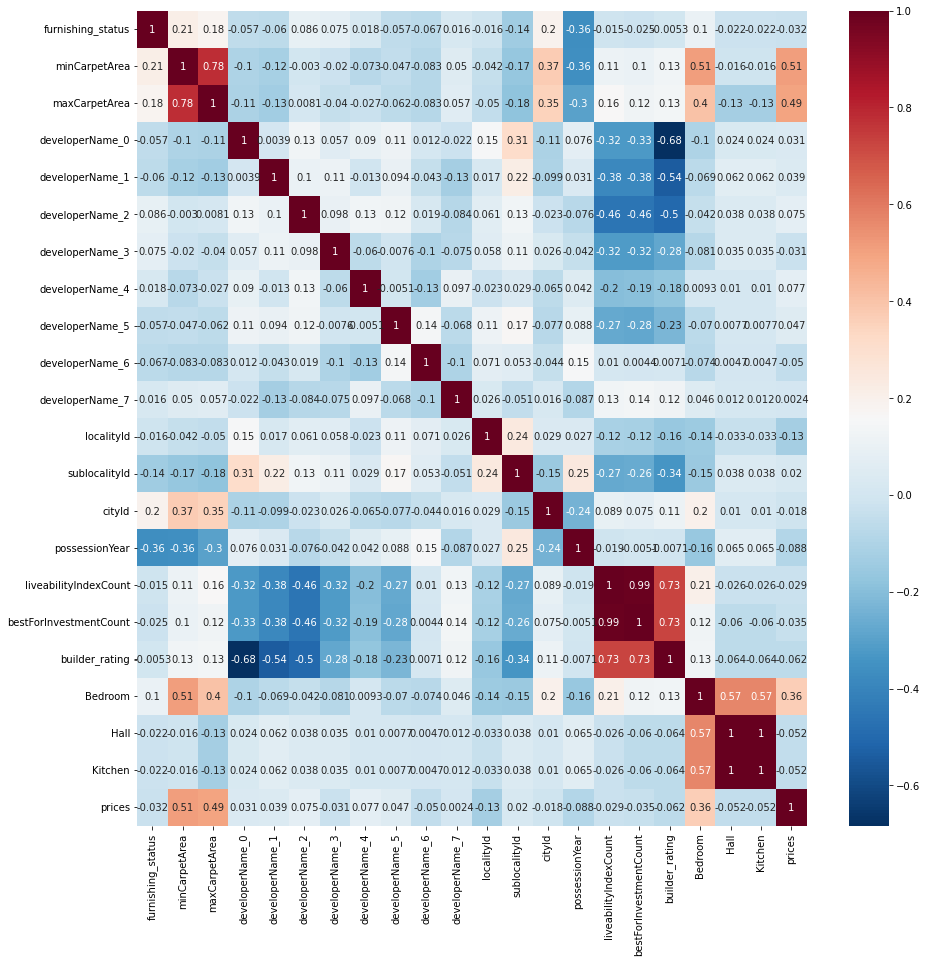

In [99]:
fig, ax = plt.subplots(figsize=(15,15))  
sb.heatmap(df.corr(), 
            cmap='RdBu_r',
            annot=True)

since high correlation hence dropping 

In [100]:
df = df.drop(['liveabilityIndexCount','Kitchen'], axis = 1)

In [101]:
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,...,localityId,sublocalityId,cityId,possessionYear,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,prices
0,0,471,2342,Under Construction,0,0,0,0,0,0,...,474,882,1,2022.0,appartment,10,5.0,2.5,1,12300000
1,0,304,1707,Ready Possession,0,0,0,0,0,0,...,35,1457,1,NaN,appartment,10,5.0,2.5,1,4750000
2,0,701,1092,Ready Possession,0,0,0,0,0,0,...,474,882,1,NaN,appartment,9,5.0,2.5,1,16600000
4,0,316,413,Under Construction,0,0,0,0,0,0,...,474,884,1,2024.0,commercial_office,9,5.0,0.0,0,9400000
6,0,566,784,Under Construction,0,0,0,0,0,0,...,42,1563,1,2026.0,appartment,10,5.0,2.5,1,21000000
7,0,2200,3668,Ready Possession,0,0,0,0,0,0,...,474,1587,1,NaN,appartment,9,5.0,4.5,1,58600000
8,0,253,253,Ready Possession,0,0,0,0,0,0,...,35,1457,1,NaN,commercial_office,9,5.0,0.0,0,11299999
9,0,316,316,Ready Possession,0,0,0,0,0,0,...,474,1465,1,2019.0,commercial_office,9,5.0,0.0,0,9711000
10,0,316,323,Under Construction,0,0,0,0,0,0,...,474,884,1,2024.0,commercial_office,9,5.0,0.0,0,11600000
11,0,263,1764,Under Construction,0,0,0,0,0,0,...,474,882,1,2023.0,appartment,10,5.0,2.5,1,5630000


#### Property Type

In [102]:
df['propertyType'].unique()

array(['appartment', 'commercial_office'], dtype=object)

In [103]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
df['propertyType'] = gle.fit_transform(df['propertyType'])
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,...,localityId,sublocalityId,cityId,possessionYear,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,prices
0,0,471,2342,Under Construction,0,0,0,0,0,0,...,474,882,1,2022.0,0,10,5.0,2.5,1,12300000
1,0,304,1707,Ready Possession,0,0,0,0,0,0,...,35,1457,1,NaN,0,10,5.0,2.5,1,4750000
2,0,701,1092,Ready Possession,0,0,0,0,0,0,...,474,882,1,NaN,0,9,5.0,2.5,1,16600000
4,0,316,413,Under Construction,0,0,0,0,0,0,...,474,884,1,2024.0,1,9,5.0,0.0,0,9400000
6,0,566,784,Under Construction,0,0,0,0,0,0,...,42,1563,1,2026.0,0,10,5.0,2.5,1,21000000
7,0,2200,3668,Ready Possession,0,0,0,0,0,0,...,474,1587,1,NaN,0,9,5.0,4.5,1,58600000
8,0,253,253,Ready Possession,0,0,0,0,0,0,...,35,1457,1,NaN,1,9,5.0,0.0,0,11299999
9,0,316,316,Ready Possession,0,0,0,0,0,0,...,474,1465,1,2019.0,1,9,5.0,0.0,0,9711000
10,0,316,323,Under Construction,0,0,0,0,0,0,...,474,884,1,2024.0,1,9,5.0,0.0,0,11600000
11,0,263,1764,Under Construction,0,0,0,0,0,0,...,474,882,1,2023.0,0,10,5.0,2.5,1,5630000


#### possessionStatus

In [104]:
df['possessionStatus'].unique()

array(['Under Construction', 'Ready Possession'], dtype=object)

In [105]:
df['possessionStatus'] = gle.fit_transform(df['possessionStatus'])
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,...,localityId,sublocalityId,cityId,possessionYear,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,prices
0,0,471,2342,1,0,0,0,0,0,0,...,474,882,1,2022.0,0,10,5.0,2.5,1,12300000
1,0,304,1707,0,0,0,0,0,0,0,...,35,1457,1,NaN,0,10,5.0,2.5,1,4750000
2,0,701,1092,0,0,0,0,0,0,0,...,474,882,1,NaN,0,9,5.0,2.5,1,16600000
4,0,316,413,1,0,0,0,0,0,0,...,474,884,1,2024.0,1,9,5.0,0.0,0,9400000
6,0,566,784,1,0,0,0,0,0,0,...,42,1563,1,2026.0,0,10,5.0,2.5,1,21000000
7,0,2200,3668,0,0,0,0,0,0,0,...,474,1587,1,NaN,0,9,5.0,4.5,1,58600000
8,0,253,253,0,0,0,0,0,0,0,...,35,1457,1,NaN,1,9,5.0,0.0,0,11299999
9,0,316,316,0,0,0,0,0,0,0,...,474,1465,1,2019.0,1,9,5.0,0.0,0,9711000
10,0,316,323,1,0,0,0,0,0,0,...,474,884,1,2024.0,1,9,5.0,0.0,0,11600000
11,0,263,1764,1,0,0,0,0,0,0,...,474,882,1,2023.0,0,10,5.0,2.5,1,5630000


#### propetyBuyOrRent

In [106]:
df['propetyBuyOrRent'].unique()

array(['buy'], dtype=object)

In [107]:
df = df.drop(['propetyBuyOrRent'], axis = 1)

In [108]:
df['possessionYear'].value_counts()

2023.0    283
2024.0    218
2025.0    202
2026.0    118
2021.0    115
2019.0     92
2022.0     75
2020.0     54
2015.0     52
2018.0     51
2016.0     49
2017.0     35
2027.0     27
2014.0     24
2012.0     12
2028.0     11
2013.0     10
2010.0      5
2029.0      4
2011.0      2
2009.0      1
2005.0      1
2031.0      1
2036.0      1
2030.0      1
Name: possessionYear, dtype: int64

#### Possession year

In [109]:
df.isna().sum()

furnishing_status           0
minCarpetArea               0
maxCarpetArea               0
possessionStatus            0
developerName_0             0
developerName_1             0
developerName_2             0
developerName_3             0
developerName_4             0
developerName_5             0
developerName_6             0
developerName_7             0
localityId                  0
sublocalityId               0
cityId                      0
possessionYear            240
propertyType                0
bestForInvestmentCount      0
builder_rating              0
Bedroom                     0
Hall                        0
prices                      0
dtype: int64

In [110]:
# Filling the rows with the most frequent year 
df=df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df['possessionYear'].isna().sum()

0

In [111]:
df.head(10)

,furnishing_status,minCarpetArea,maxCarpetArea,possessionStatus,developerName_0,developerName_1,developerName_2,developerName_3,developerName_4,developerName_5,...,localityId,sublocalityId,cityId,possessionYear,propertyType,bestForInvestmentCount,builder_rating,Bedroom,Hall,prices
0,0,471,2342,1,0,0,0,0,0,0,...,474,882,1,2022.0,0,10,5.0,2.5,1,12300000
1,0,304,1707,0,0,0,0,0,0,0,...,35,1457,1,2023.0,0,10,5.0,2.5,1,4750000
2,0,701,1092,0,0,0,0,0,0,0,...,474,882,1,2023.0,0,9,5.0,2.5,1,16600000
4,0,316,413,1,0,0,0,0,0,0,...,474,884,1,2024.0,1,9,5.0,0.0,0,9400000
6,0,566,784,1,0,0,0,0,0,0,...,42,1563,1,2026.0,0,10,5.0,2.5,1,21000000
7,0,2200,3668,0,0,0,0,0,0,0,...,474,1587,1,2023.0,0,9,5.0,4.5,1,58600000
8,0,253,253,0,0,0,0,0,0,0,...,35,1457,1,2023.0,1,9,5.0,0.0,0,11299999
9,0,316,316,0,0,0,0,0,0,0,...,474,1465,1,2019.0,1,9,5.0,0.0,0,9711000
10,0,316,323,1,0,0,0,0,0,0,...,474,884,1,2024.0,1,9,5.0,0.0,0,11600000
11,0,263,1764,1,0,0,0,0,0,0,...,474,882,1,2023.0,0,10,5.0,2.5,1,5630000


In [112]:
X = df.drop(['localityId','sublocalityId'], axis=1)

In [113]:
df1=df.copy()

In [114]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)

In [115]:
X

array([[0.00e+00, 4.71e+02, 2.34e+03, ..., 5.00e+00, 2.50e+00, 1.00e+00],
       [0.00e+00, 3.04e+02, 1.71e+03, ..., 5.00e+00, 2.50e+00, 1.00e+00],
       [0.00e+00, 7.01e+02, 1.09e+03, ..., 5.00e+00, 2.50e+00, 1.00e+00],
       ...,
       [0.00e+00, 4.15e+02, 7.70e+02, ..., 2.00e+00, 1.50e+00, 1.00e+00],
       [0.00e+00, 4.13e+02, 5.48e+02, ..., 2.00e+00, 1.50e+00, 1.00e+00],
       [0.00e+00, 4.57e+02, 8.56e+02, ..., 2.00e+00, 2.50e+00, 1.00e+00]])

In [116]:
y

array([[12300000],
       [ 4750000],
       [16600000],
       ...,
       [21400000],
       [ 5500000],
       [40000000]])

In [117]:
X1=df[['minCarpetArea']]
y1=df['prices']

In [118]:
X1

,minCarpetArea
0,471
1,304
2,701
4,316
6,566
...,...
1850,754
1852,698
1854,415
1856,413


In [119]:
y1

0       12300000
1        4750000
2       16600000
4        9400000
6       21000000
          ...   
1850    22300000
1852     9039000
1854    21400000
1856     5500000
1857    40000000
Name: prices, Length: 1684, dtype: int64

In [120]:
X2=df[['maxCarpetArea']]
y2=df['prices']

In [121]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Scale the target values
y = scaler.fit_transform(y)

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [123]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 1/3, random_state = 0)

In [124]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 1/3, random_state = 0)

##Feature Scaling

In [125]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:, 1:3]=sc.fit_transform(X_train[:,1:3])
X_test[:, 1:3]=sc.transform(X_test[:, 1:3])

##Linear Regression and Polynomial Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)

LinearRegression()

In [127]:
y_pred = regressor.predict(X1_test)

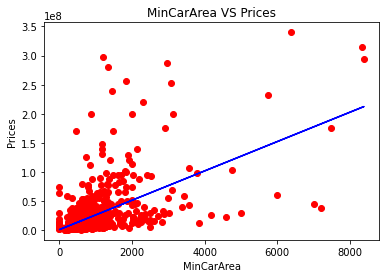

In [128]:
plt.scatter(X1_train, y1_train, color = 'red')
plt.plot(X1_train, regressor.predict(X1_train), color = 'blue')
plt.title('MinCarArea VS Prices')
plt.xlabel('MinCarArea')
plt.ylabel('Prices')
plt.show()

In [129]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y1)

LinearRegression()

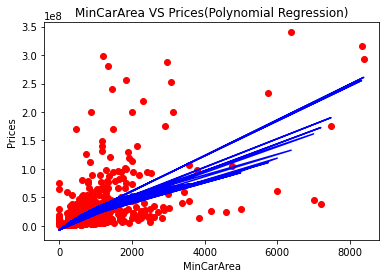

In [130]:
plt.scatter(X1_train, y1_train, color = 'red')
plt.plot(X1_train, lin_reg_2.predict(poly_reg.fit_transform(X1_train)), color = 'blue')
plt.title('MinCarArea VS Prices(Polynomial Regression)')
plt.xlabel('MinCarArea')
plt.ylabel('Prices')
plt.show()

In [131]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X2_train, y2_train)

LinearRegression()

In [132]:
y_pred = regressor.predict(X2_test)

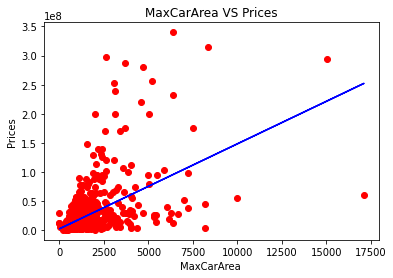

In [133]:
plt.scatter(X2_train, y2_train, color = 'red')
plt.plot(X2_train, regressor.predict(X2_train), color = 'blue')
plt.title('MaxCarArea VS Prices')
plt.xlabel('MaxCarArea ')
plt.ylabel('Prices')
plt.show()

In [134]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X2)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y2)

LinearRegression()

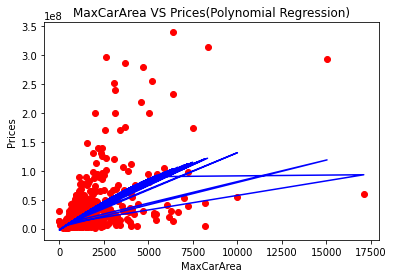

In [135]:
plt.scatter(X2_train, y2_train, color = 'red')
plt.plot(X2_train, lin_reg_2.predict(poly_reg.fit_transform(X2_train)), color = 'blue')
plt.title('MaxCarArea VS Prices(Polynomial Regression)')
plt.xlabel('MaxCarArea')
plt.ylabel('Prices')
plt.show()

##MLR


In [171]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [172]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-6.67e-01 -4.14e-01]
 [ 1.01e+00  2.09e+00]
 [-2.78e-01 -8.05e-02]
 [-1.08e+00 -2.51e-01]
 [ 1.18e-01 -1.90e-01]
 [ 5.82e-02 -2.04e-01]
 [-5.73e-02 -5.03e-01]
 [-4.53e-01 -2.95e-01]
 [-3.19e-01 -4.02e-01]
 [-1.08e-01 -3.44e-01]
 [-3.65e-01 -4.40e-01]
 [ 1.13e+00  1.21e+00]
 [-8.64e-01 -2.18e-01]
 [-4.53e-01 -5.23e-01]
 [ 3.99e-01  4.72e-01]
 [-5.17e-01 -5.26e-01]
 [ 2.97e-01  1.75e-01]
 [-4.92e-01 -4.13e-01]
 [ 3.66e-02 -1.96e-01]
 [ 1.45e-01 -4.09e-01]
 [-1.65e-01 -2.89e-01]
 [-8.19e-02 -3.20e-01]
 [-3.10e-01 -2.89e-01]
 [-1.62e-01  1.48e-01]
 [ 1.15e+00  2.45e+00]
 [-6.86e-01 -4.15e-01]
 [-1.91e-01 -2.40e-01]
 [ 5.38e-01 -8.88e-02]
 [-3.91e-01 -1.24e-01]
 [-2.27e-01 -1.90e-01]
 [-2.86e-01 -3.39e-01]
 [-2.74e-01 -3.77e-01]
 [-2.24e-01 -1.05e-01]
 [-4.73e-01 -5.49e-01]
 [ 6.24e-01  9.53e-01]
 [-1.76e-01 -1.19e-01]
 [ 1.15e-01 -3.77e-01]
 [-6.09e-01 -3.55e-01]
 [-8.27e-01 -4.57e-01]
 [-3.14e-01 -3.17e-01]
 [-6.66e-01 -4.10e-01]
 [-3.71e-01 -2.40e-01]
 [ 2.50e-02 -1.05e-01]
 [ 1.19e+00

In [173]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.3718791442999452
Mean Squared Error: 0.45133980419206365
R-squared: 0.21178833799938845


##SVR

In [193]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [194]:
y_pred = svr_regressor.predict(X)

In [195]:
residuals = y_test - y_pred
print("Residuals:", residuals)

Residuals: [[-0.15 -0.24 -0.06 ... -0.2  -0.07 -0.24]
 [ 2.36  2.26  2.45 ...  2.3   2.44  2.27]
 [ 0.19  0.09  0.28 ...  0.13  0.27  0.09]
 ...
 [ 2.21  2.11  2.3  ...  2.16  2.29  2.12]
 [-0.13 -0.22 -0.03 ... -0.18 -0.04 -0.22]
 [-0.2  -0.3  -0.11 ... -0.26 -0.12 -0.29]]


In [196]:
y_pred = svr_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-5.01e-01 -4.14e-01]
 [-5.50e-01  2.09e+00]
 [-5.61e-01 -8.05e-02]
 [-3.24e-01 -2.51e-01]
 [-5.01e-01 -1.90e-01]
 [-5.01e-01 -2.04e-01]
 [-4.28e-01 -5.03e-01]
 [-5.47e-01 -2.95e-01]
 [-5.01e-01 -4.02e-01]
 [-5.46e-01 -3.44e-01]
 [-5.56e-01 -4.40e-01]
 [-4.09e-01  1.21e+00]
 [-5.61e-01 -2.18e-01]
 [-5.44e-01 -5.23e-01]
 [-4.00e-01  4.72e-01]
 [-4.27e-01 -5.26e-01]
 [-5.40e-01  1.75e-01]
 [-5.54e-01 -4.13e-01]
 [-5.36e-01 -1.96e-01]
 [-5.57e-01 -4.09e-01]
 [-5.50e-01 -2.89e-01]
 [-5.59e-01 -3.20e-01]
 [-5.01e-01 -2.89e-01]
 [-3.24e-01  1.48e-01]
 [-5.48e-01  2.45e+00]
 [-4.77e-01 -4.15e-01]
 [-5.14e-01 -2.40e-01]
 [-5.12e-01 -8.88e-02]
 [-5.62e-01 -1.24e-01]
 [-5.47e-01 -1.90e-01]
 [-5.50e-01 -3.39e-01]
 [-4.91e-01 -3.77e-01]
 [-5.22e-01 -1.05e-01]
 [-4.30e-01 -5.49e-01]
 [-5.45e-01  9.53e-01]
 [-5.43e-01 -1.19e-01]
 [-4.53e-01 -3.77e-01]
 [-5.11e-01 -3.55e-01]
 [-5.60e-01 -4.57e-01]
 [-5.47e-01 -3.17e-01]
 [-5.40e-01 -4.10e-01]
 [-4.28e-01 -2.40e-01]
 [-5.54e-01 -1.05e-01]
 [-4.05e-01

In [197]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.4152450913065523
Mean Squared Error: 0.7397522473969681
R-squared: -0.291889930765616


##Decision Tree

In [180]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [181]:
y_pred = dt_regressor.predict(X)

In [182]:
residuals = y_test - y_pred
print("Residuals:", residuals)

Residuals: [[ -9.13  -9.13  -9.13 ... -10.21 -10.21 -10.21]
 [ -6.63  -6.63  -6.63 ...  -7.7   -7.7   -7.7 ]
 [ -8.8   -8.8   -8.8  ...  -9.87  -9.87  -9.87]
 ...
 [ -6.77  -6.77  -6.77 ...  -7.85  -7.85  -7.85]
 [ -9.11  -9.11  -9.11 ... -10.18 -10.18 -10.18]
 [ -9.19  -9.19  -9.19 ... -10.26 -10.26 -10.26]]


In [183]:
y_pred1 = dt_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[-3.86e-01 -4.14e-01]
 [ 7.08e-01  2.09e+00]
 [ 1.72e-01 -8.05e-02]
 [-4.13e-01 -2.51e-01]
 [-2.95e-01 -1.90e-01]
 [-3.11e-01 -2.04e-01]
 [-3.91e-01 -5.03e-01]
 [-4.42e-01 -2.95e-01]
 [-4.10e-01 -4.02e-01]
 [-3.98e-01 -3.44e-01]
 [-4.32e-01 -4.40e-01]
 [ 2.12e+00  1.21e+00]
 [-5.50e-01 -2.18e-01]
 [-5.00e-01 -5.23e-01]
 [ 1.50e-01  4.72e-01]
 [-4.13e-01 -5.26e-01]
 [ 1.75e-01  1.75e-01]
 [-3.00e-01 -4.13e-01]
 [-2.34e-01 -1.96e-01]
 [-8.33e-02 -4.09e-01]
 [-4.34e-01 -2.89e-01]
 [-4.72e-01 -3.20e-01]
 [-3.89e-01 -2.89e-01]
 [-7.50e-02  1.48e-01]
 [ 9.89e+00  2.45e+00]
 [-3.95e-01 -4.15e-01]
 [-2.15e-01 -2.40e-01]
 [ 5.30e-01 -8.88e-02]
 [-3.31e-01 -1.24e-01]
 [-2.37e-01 -1.90e-01]
 [-3.36e-01 -3.39e-01]
 [-3.47e-01 -3.77e-01]
 [ 1.31e-01 -1.05e-01]
 [-4.46e-01 -5.49e-01]
 [ 1.75e-01  9.53e-01]
 [-4.60e-01 -1.19e-01]
 [ 8.18e-01 -3.77e-01]
 [-4.06e-01 -3.55e-01]
 [-4.94e-01 -4.57e-01]
 [-2.10e-01 -3.17e-01]
 [-5.70e-01 -4.10e-01]
 [-5.01e-01 -2.40e-01]
 [ 7.44e-03 -1.05e-01]
 [ 6.40e-01

In [184]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred1)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred1)

# calculate R-squared
r2 = r2_score(y_test, y_pred1)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.3180343600888295
Mean Squared Error: 0.8327071313913059
R-squared: -0.45422465711532745


##Random Forest

In [185]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train, y_train)

<ipython-input-185-946cd212942c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [186]:
y_pred = regressor.predict(X)

In [149]:
residuals = y_test - y_pred
print("Residuals:", residuals)

Residuals: [[-6.17 -6.07 -6.17 ... -6.16 -6.67 -7.37]
 [-3.66 -3.56 -3.66 ... -3.65 -4.16 -4.87]
 [-5.84 -5.73 -5.84 ... -5.83 -6.33 -7.04]
 ...
 [-3.81 -3.71 -3.81 ... -3.8  -4.31 -5.01]
 [-6.15 -6.05 -6.15 ... -6.14 -6.64 -7.35]
 [-6.22 -6.12 -6.22 ... -6.21 -6.72 -7.43]]


In [189]:
y_pred2 = rf_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[-4.13e-01 -4.14e-01]
 [ 9.55e-01  2.09e+00]
 [-1.03e-01 -8.05e-02]
 [-3.85e-01 -2.51e-01]
 [-1.55e-01 -1.90e-01]
 [-2.51e-01 -2.04e-01]
 [-4.03e-01 -5.03e-01]
 [-3.39e-01 -2.95e-01]
 [-4.48e-01 -4.02e-01]
 [-1.34e-01 -3.44e-01]
 [-3.99e-01 -4.40e-01]
 [ 1.92e+00  1.21e+00]
 [-4.14e-01 -2.18e-01]
 [-4.58e-01 -5.23e-01]
 [ 1.62e-01  4.72e-01]
 [-4.35e-01 -5.26e-01]
 [ 2.13e-01  1.75e-01]
 [-4.36e-01 -4.13e-01]
 [-1.79e-01 -1.96e-01]
 [-3.35e-01 -4.09e-01]
 [-3.97e-01 -2.89e-01]
 [-3.17e-01 -3.20e-01]
 [-3.57e-01 -2.89e-01]
 [ 5.14e-01  1.48e-01]
 [ 2.87e+00  2.45e+00]
 [-4.18e-01 -4.15e-01]
 [-6.50e-02 -2.40e-01]
 [ 4.94e-01 -8.88e-02]
 [-2.25e-01 -1.24e-01]
 [-2.87e-01 -1.90e-01]
 [-3.87e-01 -3.39e-01]
 [-3.91e-01 -3.77e-01]
 [ 1.35e-01 -1.05e-01]
 [-4.05e-01 -5.49e-01]
 [ 3.94e-01  9.53e-01]
 [-2.92e-01 -1.19e-01]
 [ 2.81e-01 -3.77e-01]
 [-3.69e-01 -3.55e-01]
 [-4.15e-01 -4.57e-01]
 [-3.08e-01 -3.17e-01]
 [-4.72e-01 -4.10e-01]
 [-2.65e-01 -2.40e-01]
 [-8.90e-02 -1.05e-01]
 [ 1.03e+00

In [190]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred2)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred2)

# calculate R-squared
r2 = r2_score(y_test, y_pred2)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.22627903819574854
Mean Squared Error: 0.290736581718497
R-squared: 0.4922628978161313
